In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Define dataset paths
train_dir = "wastes/train"
test_dir = "wastes/test"

In [3]:
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [5]:
# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9214 images belonging to 9 classes.
Found 2308 images belonging to 9 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # Update this to match the number of classes
])

d:\Waste_Classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,281 (72.63 MB)

 Trainable params: 19,038,281 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enable eager execution

In [ ]:
epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

d:\Waste_Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


d:\Waste_Classification\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2034 - loss: 2.1625

d:\Waste_Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


287/287 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.2035 - loss: 2.1620 - val_accuracy: 0.3451 - val_loss: 1.8099
Epoch 2/100
  1/287 ━━━━━━━━━━━━━━━━━━━━ 3:53 818ms/step - accuracy: 0.3438 - loss: 2.0129

d:\Waste_Classification\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


287/287 ━━━━━━━━━━━━━━━━━━━━ 43s 147ms/step - accuracy: 0.3438 - loss: 2.0129 - val_accuracy: 0.3520 - val_loss: 1.8072
Epoch 3/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.3057 - loss: 1.8630 - val_accuracy: 0.3403 - val_loss: 1.7435
Epoch 4/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - accuracy: 0.2500 - loss: 1.9916 - val_accuracy: 0.3429 - val_loss: 1.7413
Epoch 5/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.3395 - loss: 1.8148 - val_accuracy: 0.3572 - val_loss: 1.7356
Epoch 6/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 40s 138ms/step - accuracy: 0.4375 - loss: 1.6494 - val_accuracy: 0.3650 - val_loss: 1.7328
Epoch 7/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.3555 - loss: 1.7759 - val_accuracy: 0.3863 - val_loss: 1.6551
Epoch 8/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 44s 152ms/step - accuracy: 0.2812 - loss: 1.7167 - val_accuracy: 0.3854 - val_loss: 1.6745
Epoch 9/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.3835 - loss: 1.7310 - val_

73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 516ms/step - accuracy: 0.5235 - loss: 1.5474
Test Accuracy: 51.99%


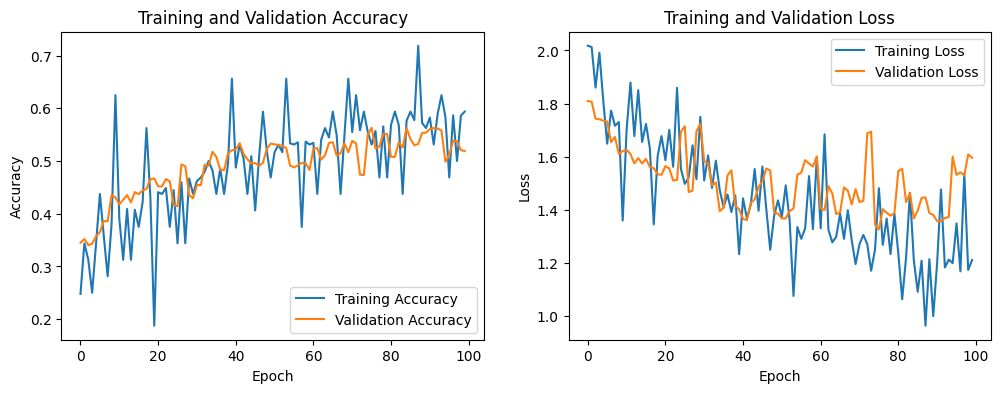

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
model.save('waste_classification_model.h5')

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('waste_classification_model.h5')

# Function to predict the class of an image
def predict_waste(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Map the predicted class index to the waste category
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[predicted_class[0]]

# Example usage
image_path = 'wastes/test/plastic waste/plastic waste (30).jpg'
print(f"Predicted Waste Category: {predict_waste(image_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Waste Category: plastic waste
